In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Jupyter visualization settings
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

In [26]:
# simulate data: three groups with different means and same standard deviation
# group sizes: n = 50 for each group
n = 50
mu_a, sigma_a = 20, 2
mu_b, sigma_b = 22, 2
mu_c, sigma_c = 24, 2
group_a, group_b, group_c = (
    np.random.normal(mu_a, sigma_a, n),
    np.random.normal(mu_b, sigma_b, n),
    np.random.normal(mu_c, sigma_c, n),
)
data = pd.DataFrame({
    'value': np.concatenate([group_a, group_b, group_c]),
    'group': ['A'] * n + ['B'] * n + ['C'] * n
})

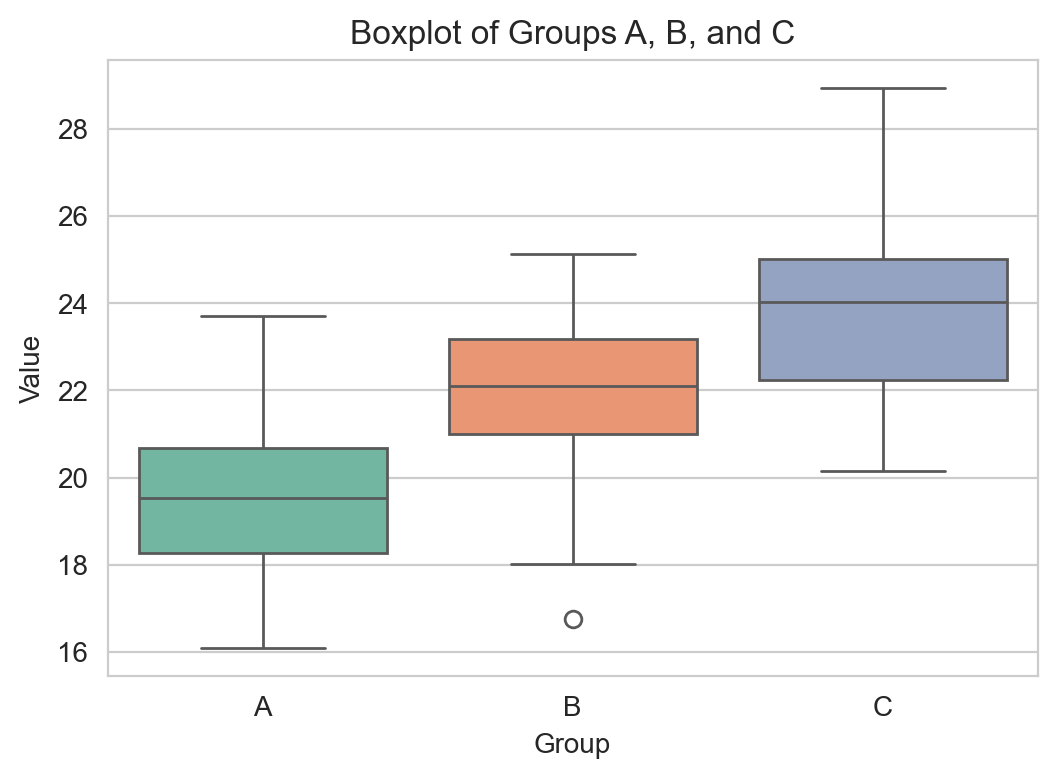

In [30]:
# visualize the data
plt.figure(figsize=(6, 4))
sns.boxplot(x='group', y='value', data=data, palette='Set2')
plt.title('Boxplot of Groups A, B, and C')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

In [28]:
# perform one-way ANOVA
model = ols('value ~ C(group)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

              sum_sq     df          F        PR(>F)
C(group)  480.947538    2.0  67.618549  1.505525e-21
Residual  522.780280  147.0        NaN           NaN


In [29]:
# interpret results
alpha = 0.05
p_value = anova_table['PR(>F)'][0]
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")

Reject the null hypothesis: At least one group mean is different.
